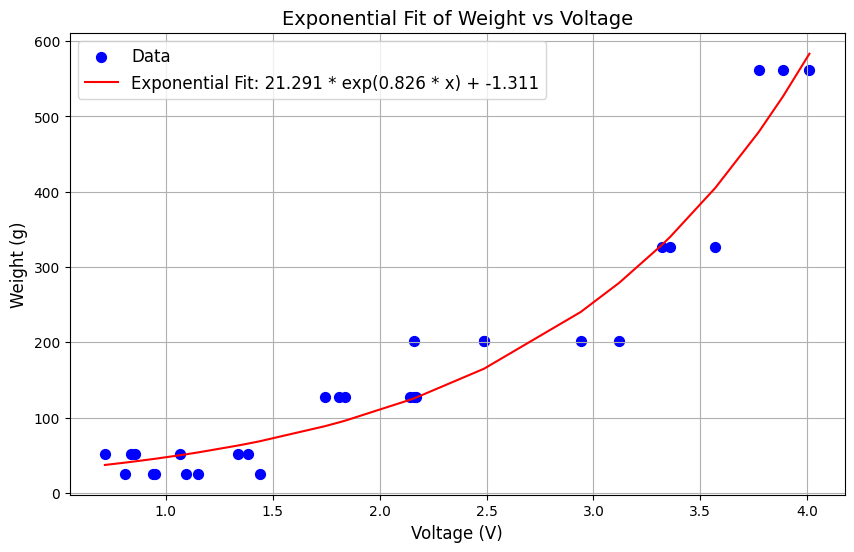

Fitting parameters: a = 21.291, b = 0.826, c = -1.311


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)


# Open the spreadsheet using the extracted sheet ID
sh = gc.open_by_key('1txeNUdgXwBa8XuWQwzzRZIG1R3tGETpU-n_bAnaWUX0')

worksheet = sh.worksheet('Mass Data for Curve')
data = worksheet.get_all_values()
table = pd.DataFrame(data[0:])
# Replace empty strings with NaN
table = table.replace(r'^\s*$', np.nan, regex=True)

# Drop rows with any NaN values
table = table.dropna()

# Reset index if needed
table = table.reset_index(drop=True)
# Data
weight = table.iloc[1:, 2].to_numpy().astype(float)
voltage = table.iloc[1:, 1].to_numpy().astype(float)

# Define the exponential function
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Fit the data
params, covariance = curve_fit(exp_func, voltage, weight)

# Extract fitting parameters
a, b, c = params

# Generate fitted data
exp_xplot = table.iloc[1:, 1].sort_values().to_numpy().astype(float)
fitted_weight = exp_func(exp_xplot, a, b, c)

# Plot the data and the fit
plt.figure(figsize=(10, 6))
plt.scatter(voltage, weight, color='blue', label='Data', s=50)
plt.plot(exp_xplot, fitted_weight, color='red', label=f'Exponential Fit: {a:.3f} * exp({b:.3f} * x) + {c:.3f}')
plt.xlabel('Voltage (V)', fontsize=12)
plt.ylabel('Weight (g)', fontsize=12)
plt.title('Exponential Fit of Weight vs Voltage', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print fitting parameters
print(f"Fitting parameters: a = {a:.3f}, b = {b:.3f}, c = {c:.3f}")


In [ ]:
# Exponential fit
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data
weight = np.array([25.5,51.6,127.1,201.2,274.7,348.9,561.3])
voltage = np.array([1.031144,1.311382,1.380338,1.53226,,2.650666667,3.444333333])


# Define the exponential function
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Fit the data
params, covariance = curve_fit(exp_func, voltage, weight)

# Extract fitting parameters
a, b, c = params

# Generate fitted data
fitted_weight = exp_func(voltage, a, b, c)

# Plot the data and the fit
plt.figure(figsize=(10, 6))
plt.scatter(voltage, weight, color='blue', label='Data', s=50)
plt.plot(voltage, fitted_weight, color='red', label=f'Exponential Fit: {a:.3f} * exp({b:.3f} * x) + {c:.3f}')
plt.xlabel('Voltage (V)', fontsize=12)
plt.ylabel('Weight (g)', fontsize=12)
plt.title('Exponential Fit of Weight vs Voltage', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print fitting parameters
print(f"Fitting parameters: a = {a:.3f}, b = {b:.3f}, c = {c:.3f}")

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

,0,1,2
0,1,VOLTAGE,WEIGHT
1,3,0.811,25.5
2,4,0.95,25.5
3,5,0.9422,25.5
4,7,1.065,51.6
5,8,1.385,51.6
6,9,1.337,51.6
7,11,1.811,127.1
8,12,1.743,127.1
9,13,1.838,127.1


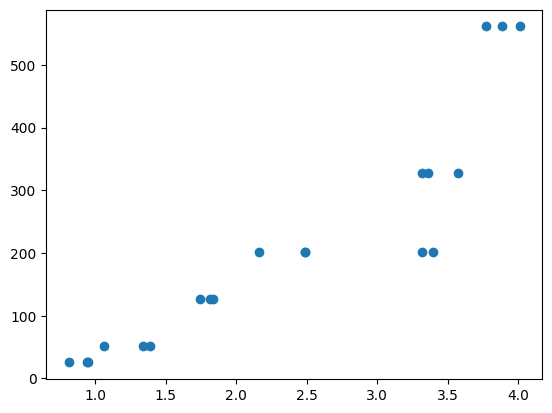

In [ ]:

plt.scatter(weight,voltage)

Fitted parameters: a = 1.0849, b = 0.0022


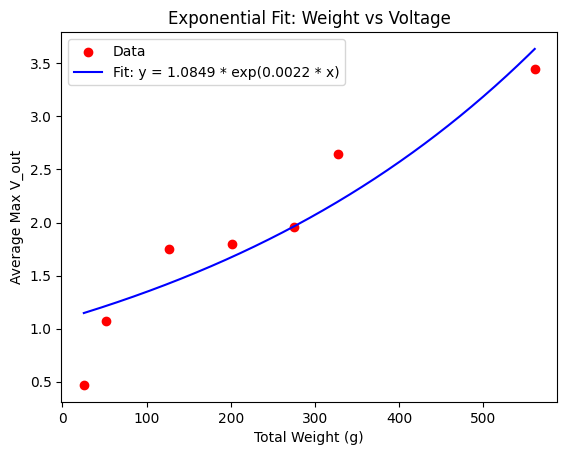

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data
weights = np.array([25.5, 51.6, 127.1, 201.2, 327, 561.3, 275.7])  # x-axis
voltages = np.array([0.4682, 1.073666667, 1.746, 1.797333333, 2.650666667, 3.444333333, 1.957666667])  # y-axis

# Define the exponential function
def exponential(x, a, b):
    return a * np.exp(b * x)

# Fit the curve
popt, pcov = curve_fit(exponential, weights, voltages, p0=(1, 0.001))

# Extract fitting parameters
a, b = popt
print(f"Fitted parameters: a = {a:.4f}, b = {b:.4f}")

# Generate fitted data
weights_fit = np.linspace(min(weights), max(weights), 500)
voltages_fit = exponential(weights_fit, a, b)

# Plot the data and the fit
plt.scatter(weights, voltages, color='red', label='Data')
plt.plot(weights_fit, voltages_fit, color='blue', label=f'Fit: y = {a:.4f} * exp({b:.4f} * x)')
plt.xlabel('Total Weight (g)')
plt.ylabel('Average Max V_out')
plt.legend()
plt.title('Exponential Fit: Weight vs Voltage')
plt.show()

Fitted polynomial:        2
33.85 x + 49.91 x - 16.33


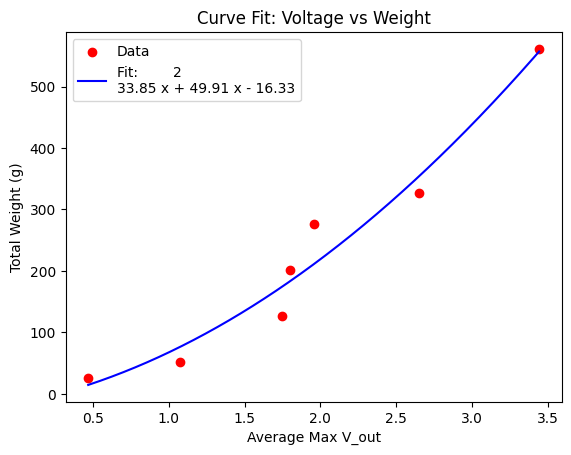

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Data
voltages = np.array([0.4682, 1.073666667, 1.746, 1.797333333, 2.650666667, 3.444333333, 1.957666667])  # x-axis
weights = np.array([25.5, 51.6, 127.1, 201.2, 327, 561.3, 275.7])  # y-axis

# Fit a second-degree polynomial (quadratic)
coefficients = np.polyfit(voltages, weights, 2)
polynomial = np.poly1d(coefficients)

# Generate fitted data for plotting
voltages_fit = np.linspace(min(voltages), max(voltages), 500)
weights_fit = polynomial(voltages_fit)

# Display polynomial equation
print(f"Fitted polynomial: {polynomial}")

# Plot the data and the fit
plt.scatter(voltages, weights, color='red', label='Data')
plt.plot(voltages_fit, weights_fit, color='blue', label=f'Fit: {polynomial}')
plt.xlabel('Average Max V_out')
plt.ylabel('Total Weight (g)')
plt.legend()
plt.title('Curve Fit: Voltage vs Weight')
plt.show()


Fitted polynomial:        2
43.79 x - 95.06 x + 40.46


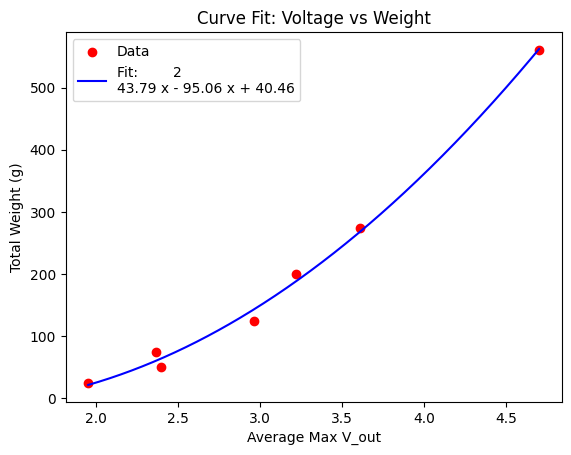

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Data
voltages = np.array([1.9506,2.3932,2.365,2.9652,3.2162,3.612,4.7032])  # x-axis


weights = np.array([24.2,50.3,74.5,124.8,199.9,274.4,560])  # y-axis

# Fit a second-degree polynomial (quadratic)
coefficients = np.polyfit(voltages, weights, 2)
polynomial = np.poly1d(coefficients)

# Generate fitted data for plotting
voltages_fit = np.linspace(min(voltages), max(voltages), 500)
weights_fit = polynomial(voltages_fit)

# Display polynomial equation
print(f"Fitted polynomial: {polynomial}")

# Plot the data and the fit
plt.scatter(voltages, weights, color='red', label='Data')
plt.plot(voltages_fit, weights_fit, color='blue', label=f'Fit: {polynomial}')
plt.xlabel('Average Max V_out')
plt.ylabel('Total Weight (g)')
plt.legend()
plt.title('Curve Fit: Voltage vs Weight')
plt.show()


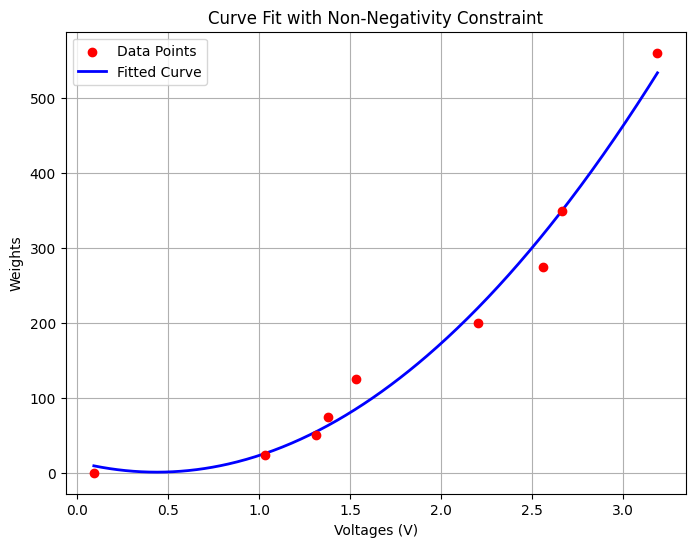

Fitted Parameters:
a = 70.3476, b = -61.5911, c = 14.2551


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data
voltages = np.array([0.0918,1.031144,1.311382,1.380338,1.53226,2.203742,2.55738,2.663616,3.188796])  # x-axis
weights = np.array([0, 24.2, 50.3, 74.5, 124.8, 199.9, 274.4, 348.9,560])  # y-axis

# Define a model to fit, ensuring non-negativity (e.g., quadratic)
def model(x, a, b, c):
    return np.maximum(0, a * x**2 + b * x + c)  # Ensure non-negativity

# Initial guesses for parameters
initial_guess = [10, 10, 0]

# Curve fitting
params, _ = curve_fit(model, voltages, weights, p0=initial_guess)

# Generate data for the fitted curve
voltages_fit = np.linspace(min(voltages), max(voltages), 500)  # Smooth x-axis values
weights_fit = model(voltages_fit, *params)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(voltages, weights, color='red', label='Data Points', zorder=5)
plt.plot(voltages_fit, weights_fit, color='blue', label='Fitted Curve', linewidth=2)
plt.title('Curve Fit with Non-Negativity Constraint')
plt.xlabel('Voltages (V)')
plt.ylabel('Weights')
plt.grid(True)
plt.legend()
plt.show()

# Display fitted parameters
print("Fitted Parameters:")
print(f"a = {params[0]:.4f}, b = {params[1]:.4f}, c = {params[2]:.4f}")

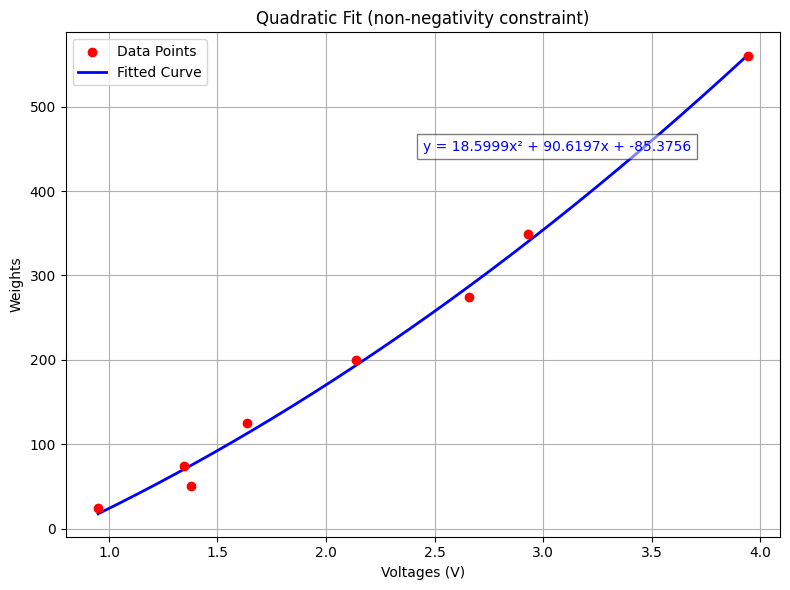

Fitted Parameters:
a = 18.5999, b = 90.6197, c = -85.3756


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data
voltages = np.array([0.95, 1.378, 1.346, 1.638, 2.136, 2.66, 2.932, 3.942])  # x-axis
weights = np.array([24.2, 50.3, 74.5, 124.8, 199.9, 274.4, 348.9, 560])  # y-axis

# Define a model to fit, ensuring non-negativity (e.g., quadratic)
def model(x, a, b, c):
    return np.maximum(0, a * x**2 + b * x + c)  # Ensure non-negativity

# Initial guesses for parameters
initial_guess = [10, 10, 0]

# Curve fitting
params, _ = curve_fit(model, voltages, weights, p0=initial_guess)

# Generate data for the fitted curve
voltages_fit = np.linspace(min(voltages), max(voltages), 500)  # Smooth x-axis values
weights_fit = model(voltages_fit, *params)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(voltages, weights, color='red', label='Data Points', zorder=5)
plt.plot(voltages_fit, weights_fit, color='blue', label='Fitted Curve', linewidth=2)

# Add the curve equation as a text annotation
equation_text = f"y = {params[0]:.4f}x² + {params[1]:.4f}x + {params[2]:.4f}"
plt.text(0.5 * (min(voltages) + max(voltages)), max(weights) * 0.8, equation_text,
         fontsize=10, color='blue', bbox=dict(facecolor='white', alpha=0.5))

plt.title('Quadratic Fit (non-negativity constraint)')
plt.xlabel('Voltages (V)')
plt.ylabel('Weights')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Display fitted parameters
print("Fitted Parameters:")
print(f"a = {params[0]:.4f}, b = {params[1]:.4f}, c = {params[2]:.4f}")


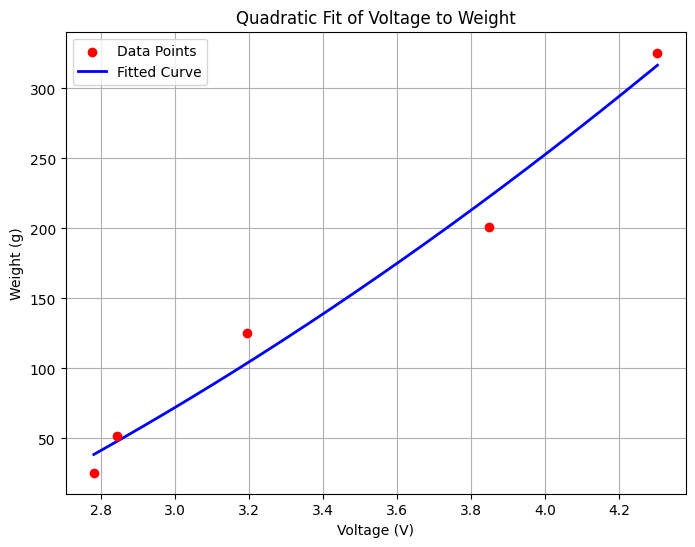

Fitted Parameters:
a = 22.6162, b = 22.2154, c = -198.1013


In [ ]:
## DEMO

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data
voltages = np.array([2.780663333,2.8438,3.194706667,3.849633333,4.304626667])  # x-axis
weights = np.array([25.5,51.6,125.6,201.2,325.5])  # y-axis


# Define a model to fit, ensuring non-negativity (e.g., quadratic)
def model(x, a, b, c):
    return np.maximum(0, a * x**2 + b * x + c)  # Ensure non-negativity

# Initial guesses for parameters
initial_guess = [10, 10, 0]

# Curve fitting
params, _ = curve_fit(model, voltages, weights, p0=initial_guess)

# Generate data for the fitted curve
voltages_fit = np.linspace(min(voltages), max(voltages), 500)  # Smooth x-axis values
weights_fit = model(voltages_fit, *params)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(voltages, weights, color='red', label='Data Points', zorder=5)
plt.plot(voltages_fit, weights_fit, color='blue', label='Fitted Curve', linewidth=2)
plt.title("Quadratic Fit of Voltage to Weight")
plt.xlabel('Voltage (V)')
plt.ylabel('Weight (g)')
plt.grid(True)
plt.legend()
plt.show()

# Display fitted parameters
print("Fitted Parameters:")
print(f"a = {params[0]:.4f}, b = {params[1]:.4f}, c = {params[2]:.4f}")

